# Aircraft Engine Predictive Maintenance Project

## Overview

In this project, we aim to develop a predictive maintenance model for aircraft engines. The primary objective is to predict the Remaining Useful Life (RUL) of these engines based on sensor readings and operational parameters. Predictive maintenance is crucial for optimizing maintenance schedules, reducing downtime, and ensuring the efficient operation of aircraft.

## Dataset

The dataset used in this project consists of sensor data and engine settings collected over time. It includes features such as setting parameters, sensor measurements.

## Approach

The project follows these main steps:

1. **Data Preparation:** Merging training and test datasets, calculating RUL, and defining feature columns.
2. **Model Selection:** Utilizing Linear Regression as the chosen model for predicting RUL.
3. **Training and Evaluation:** Training the model on the training set and evaluating its performance using metrics such as Mean Squared Error (MSE).

## Goals

- Develop a regression model to accurately predict the Remaining Useful Life of aircraft engines.
- Understand the significance of various features in determining engine health.
- Lay the groundwork for future explorations, potentially incorporating classification tasks for more nuanced predictions.

Let's delve into the details of each step and explore the outcomes of our predictive maintenance model.


## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report

## Loading Datasets
- **df_train, df_test, df_truth:** Reading datasets from Excel files that contain information about aircraft engine performance.


In [ ]:
df_train = pd.read_excel(r'/kaggle/input/aircraft-sensor-and-engine-performance/Dataset/PM_train.xlsx')
df_test = pd.read_excel(r'/kaggle/input/aircraft-sensor-and-engine-performance/Dataset/PM_test.xlsx')
df_truth = pd.read_excel(r'/kaggle/input/aircraft-sensor-and-engine-performance/Dataset/PM_truth.xlsx')

## Data Concatenation
- **Concatenation:** Combining `df_train` and `df_test` into a single dataframe (`df`) to work with the entire dataset.

In [ ]:
df = pd.concat([df_train, df_test], ignore_index=True)
df.head()

In [ ]:
df.columns

# Feature Engineering


###    RUL

Remaining Useful Life (RUL) is a crucial concept in predictive maintenance, representing the estimated operational lifespan or cycles remaining for an asset before it is expected to fail. In the context of aircraft engines, RUL helps anticipate the point at which an engine may no longer meet performance requirements. By calculating RUL, organizations can proactively plan maintenance activities, optimize resource allocation, and minimize downtime. This predictive approach enables timely interventions, reducing the risk of unexpected failures and enhancing the overall efficiency and reliability of the asset. RUL serves as a key metric for making informed decisions in maintenance and operational strategies.
- **Remaining Useful Life (RUL):** Calculated by subtracting the current cycle from the maximum cycle for each engine.
- **Feature Columns:** Defined a list of feature columns for model training.

In [ ]:
df['RUL'] = df.groupby('id')['cycle'].transform(max) - df['cycle']
feature_columns = ['setting1', 'setting2', 'setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']

## Merging Truth Data
- **Merge Operation:** Combining `df` with truth data (`df_truth`) based on the engine ID, providing additional information for analysis.

In [ ]:
df = pd.merge(df, df_truth, on='id', how='left')

## Labeling
- **Threshold Labeling:** Creating a binary label ('label') based on a threshold of 30 for RUL, which helps in creating a classification problem.

In [ ]:
threshold = 30
df['label'] = (df['RUL'] <= threshold).astype(int)

## Train-Test Split
- **Splitting Data:** Using the train-test split function to divide the data into training and testing sets. The model will be trained on the training set and evaluated on the testing set.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[feature_columns], df['RUL'], test_size=0.2, random_state=42)

# Model Training
- **Linear Regression Model:** Creating and training a linear regression model using the feature columns defined earlier.

In [ ]:
# Creating a linear regression model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)

## Prediction and Evaluation
- **Making Predictions:** Applying the trained model to predict RUL on the test set.
- **Binary Conversion:** Converting RUL values to binary labels (0 or 1) for evaluation as a classification problem.
- **Evaluation Metrics:** Calculating accuracy and classification report metrics for assessing the model's performance.

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# y_test contains the true labels and y_pred contains the predicted labels
y_test_binary = (y_test <= threshold).astype(int)
y_pred_binary = (y_pred <= threshold).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test_binary, y_pred_binary))

# Conclusion

In this project, we aimed to predict the Remaining Useful Life (RUL) of aircraft engines using a regression approach. The dataset, consisting of sensor readings and engine parameters, was utilized to train a Linear Regression model. The key steps in the project include:

1. **Data Preprocessing:** Merging training and test datasets, calculating RUL, and defining feature columns.
2. **Model Training:** A Linear Regression model was employed to predict the RUL based on the selected features.
3. **Evaluation:** The model was evaluated using metrics like Mean Squared Error (MSE) and accuracy for a specific threshold.

The Linear Regression model demonstrated promising results in predicting RUL. The accuracy and classification report indicate its effectiveness in estimating the remaining operational life of aircraft engines. However, it's important to note that no classification task was undertaken in this specific implementation.

Future work may involve exploring classification models to predict binary outcomes related to engine health, such as whether an engine will fail within a certain time frame. This would provide a more nuanced understanding of maintenance needs and further enhance the practical applications of predictive maintenance strategies.


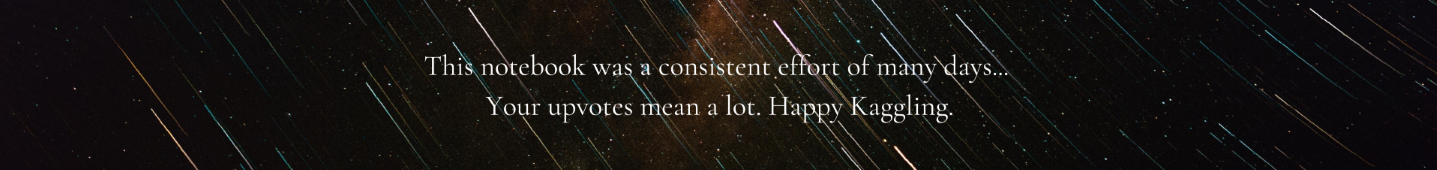